In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
%matplotlib inline

In [26]:
df = pd.read_csv('transactions_n100000.csv')
df['order_timestamp'] = pd.to_datetime(df['order_timestamp'])
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234


In [20]:
df.isna().sum()

ticket_id          0
order_timestamp    0
location           0
item_name          0
item_count         0
lat                0
long               0
dtype: int64

In [4]:
df.dtypes

ticket_id                  object
order_timestamp    datetime64[ns]
location                    int64
item_name                  object
item_count                  int64
lat                       float64
long                      float64
dtype: object

In [73]:
df.describe()

,location,item_count,lat,long
count,260741.000000,260741.000000,260741.000000,260741.000000
mean,5.128123,2.446424,41.836145,-87.733627
std,2.557513,1.330490,0.144791,0.135937
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [27]:
df = df.pivot_table('item_count', ['ticket_id', 'order_timestamp', 'location'], 'item_name') \
    .reset_index().fillna(0)
df

item_name,ticket_id,order_timestamp,location,burger,fries,salad,shake
0,0x100048,2019-03-29 12:24:00,1,0.0,3.0,3.0,0.0
1,0x100057,2019-11-24 00:24:00,6,1.0,1.0,0.0,0.0
2,0x1000ba,2019-02-09 12:02:00,5,1.0,2.0,1.0,1.0
3,0x1000fb,2019-08-31 19:28:00,4,4.0,5.0,1.0,4.0
4,0x10016e,2019-09-13 17:07:00,7,3.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...
99995,0xffddf,2019-05-27 18:07:00,4,3.0,3.0,0.0,3.0
99996,0xffe25,2019-12-16 00:30:00,6,2.0,2.0,0.0,0.0
99997,0xffec9,2019-07-04 13:30:00,1,0.0,1.0,1.0,0.0
99998,0xffedb,2019-01-25 00:53:00,2,1.0,1.0,0.0,0.0


In [28]:
df["weekend"] = (df['order_timestamp'].dt.weekday > 5).astype(int)
mask = [(df['order_timestamp'].dt.hour <= 2) | (df['order_timestamp'].dt.hour >= 21), 
        (df['order_timestamp'].dt.hour >= 11) & (df['order_timestamp'].dt.hour <= 13),
        (df['order_timestamp'].dt.hour > 13) & (df['order_timestamp'].dt.hour <= 16),
        ((df['order_timestamp'].dt.hour > 16) & (df['order_timestamp'].dt.hour < 21))]
df['time_of_day'] = np.select(mask, ['latenight', 'noon', 'afternoon', 'evening'])
df

item_name,ticket_id,order_timestamp,location,burger,fries,salad,shake,weekend,time_of_day
0,0x100048,2019-03-29 12:24:00,1,0.0,3.0,3.0,0.0,0,noon
1,0x100057,2019-11-24 00:24:00,6,1.0,1.0,0.0,0.0,1,latenight
2,0x1000ba,2019-02-09 12:02:00,5,1.0,2.0,1.0,1.0,0,noon
3,0x1000fb,2019-08-31 19:28:00,4,4.0,5.0,1.0,4.0,0,evening
4,0x10016e,2019-09-13 17:07:00,7,3.0,3.0,0.0,3.0,0,evening
...,...,...,...,...,...,...,...,...,...
99995,0xffddf,2019-05-27 18:07:00,4,3.0,3.0,0.0,3.0,0,evening
99996,0xffe25,2019-12-16 00:30:00,6,2.0,2.0,0.0,0.0,0,latenight
99997,0xffec9,2019-07-04 13:30:00,1,0.0,1.0,1.0,0.0,0,noon
99998,0xffedb,2019-01-25 00:53:00,2,1.0,1.0,0.0,0.0,0,latenight


<AxesSubplot:xlabel='hour'>

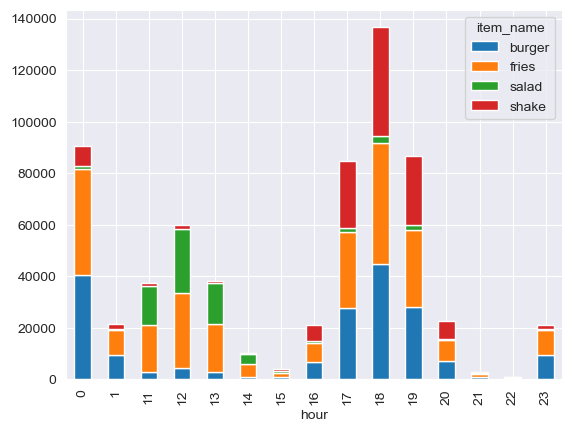

In [29]:
df['hour'] = df['order_timestamp'].dt.hour
df.groupby('hour')[['burger', 'fries', 'salad', 'shake']].sum().plot.bar(stacked=True)

In [30]:
ticker_info = df[['ticket_id', 'order_timestamp', 'hour']]
df = df.drop(['ticket_id', 'order_timestamp', 'hour'], axis=1)
df

item_name,location,burger,fries,salad,shake,weekend,time_of_day
0,1,0.0,3.0,3.0,0.0,0,noon
1,6,1.0,1.0,0.0,0.0,1,latenight
2,5,1.0,2.0,1.0,1.0,0,noon
3,4,4.0,5.0,1.0,4.0,0,evening
4,7,3.0,3.0,0.0,3.0,0,evening
...,...,...,...,...,...,...,...
99995,4,3.0,3.0,0.0,3.0,0,evening
99996,6,2.0,2.0,0.0,0.0,0,latenight
99997,1,0.0,1.0,1.0,0.0,0,noon
99998,2,1.0,1.0,0.0,0.0,0,latenight


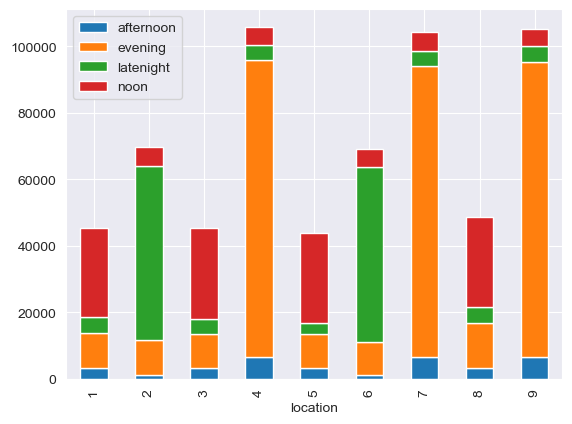

In [44]:
df.groupby(['location', 'time_of_day'])[['burger', 'fries', 'salad', 'shake']].sum().sum(axis=1) \
    .unstack().plot.bar(stacked=True).legend(loc='best')

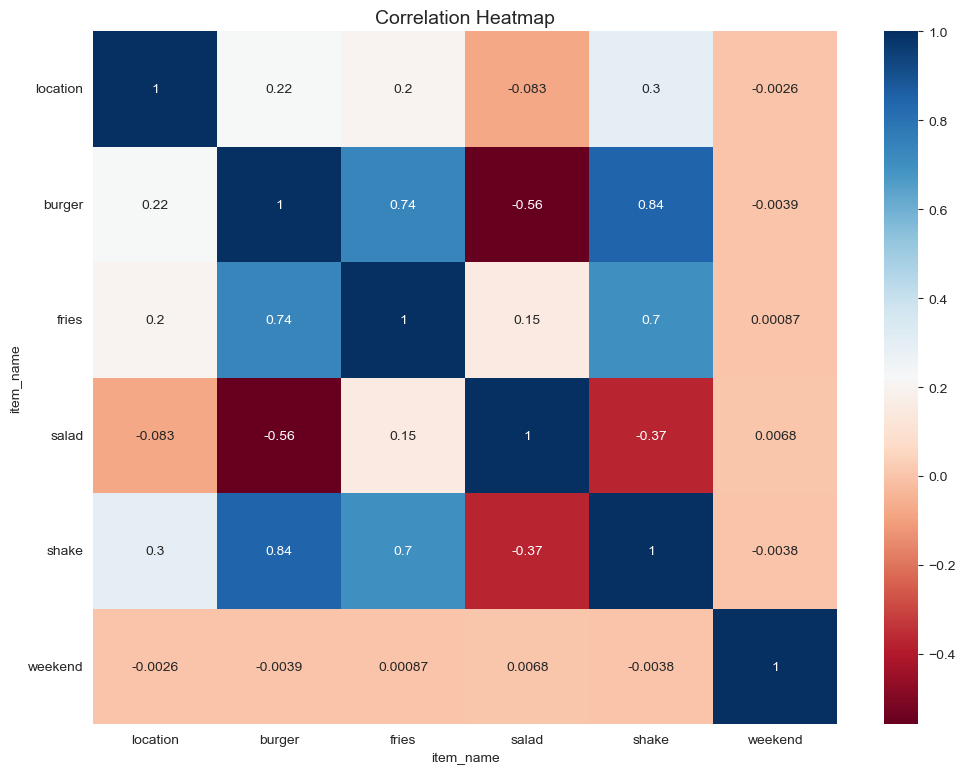

In [136]:
# Correlation Heatmap
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

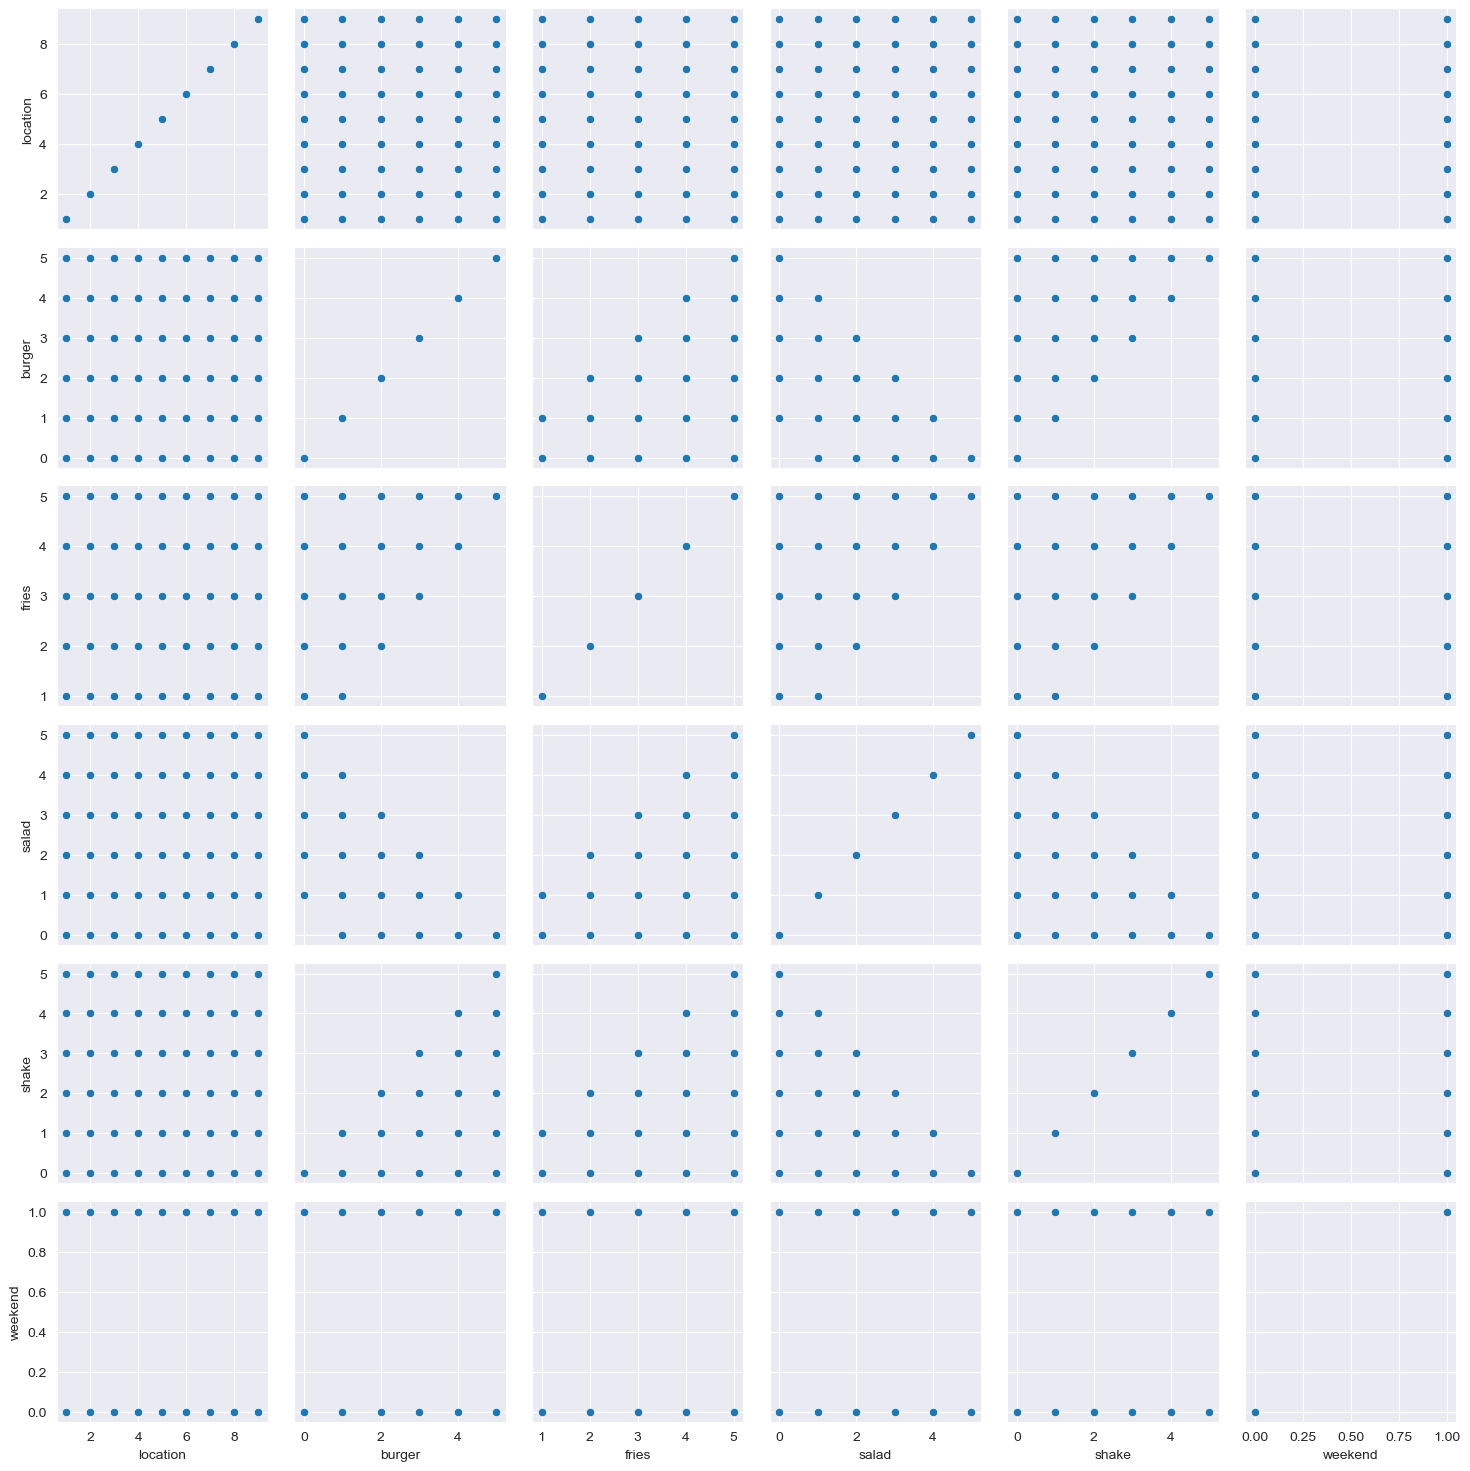

In [137]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [8]:
df_encoded = pd.get_dummies(data=df, columns=['location', 'burger', 'fries', 'salad', 'shake', 'weekend', 'time_of_day'], drop_first=True)
df_encoded

,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,burger_1.0,burger_2.0,...,salad_5.0,shake_1.0,shake_2.0,shake_3.0,shake_4.0,shake_5.0,weekend_1,time_of_day_evening,time_of_day_latenight,time_of_day_noon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
99996,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99998,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


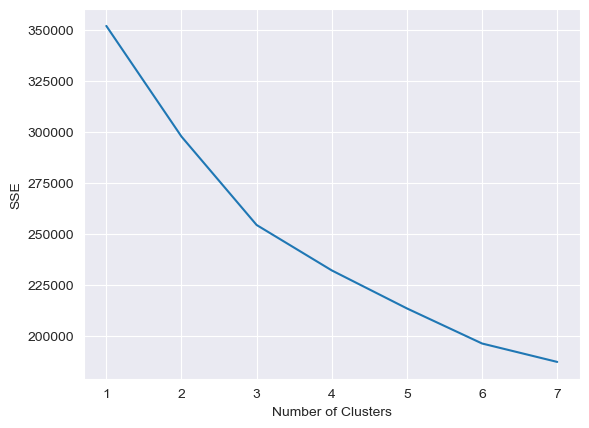

In [9]:
from sklearn.cluster import KMeans

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 8), sse)
plt.xticks(range(1, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [10]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df_encoded)

#view cluster assignments for each observation
kmeans.labels_

array([2, 0, 2, ..., 2, 0, 1], dtype=int32)

In [11]:
df['Clusters'] = kmeans.labels_
df

item_name,location,burger,fries,salad,shake,weekend,time_of_day,Clusters
0,1,0.0,3.0,3.0,0.0,0,noon,2
1,6,1.0,1.0,0.0,0.0,1,latenight,0
2,5,1.0,2.0,1.0,1.0,0,noon,2
3,4,4.0,5.0,1.0,4.0,0,evening,1
4,7,3.0,3.0,0.0,3.0,0,evening,1
...,...,...,...,...,...,...,...,...
99995,4,3.0,3.0,0.0,3.0,0,evening,1
99996,6,2.0,2.0,0.0,0.0,0,latenight,0
99997,1,0.0,1.0,1.0,0.0,0,noon,2
99998,2,1.0,1.0,0.0,0.0,0,latenight,0


<AxesSubplot:xlabel='Clusters'>

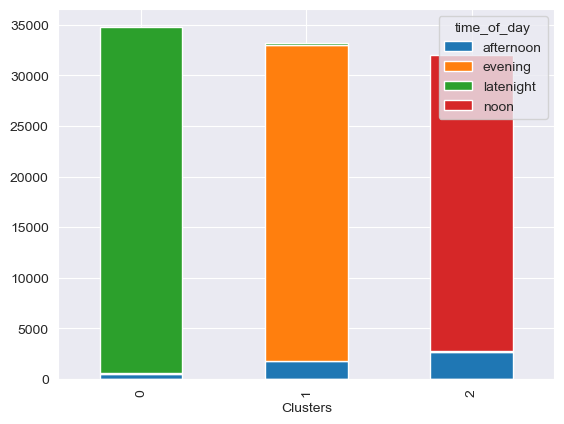

In [12]:
df.groupby('Clusters')['time_of_day'].value_counts().unstack().plot.bar(stacked=True)

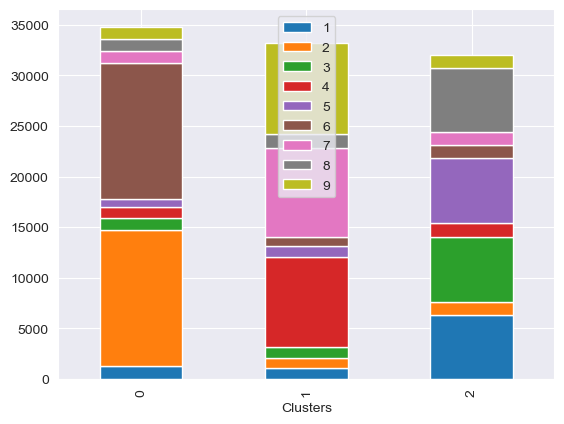

In [13]:
df.groupby('Clusters')['location'].value_counts().unstack().plot.bar(stacked=True).legend(loc='best')

<AxesSubplot:xlabel='Clusters'>

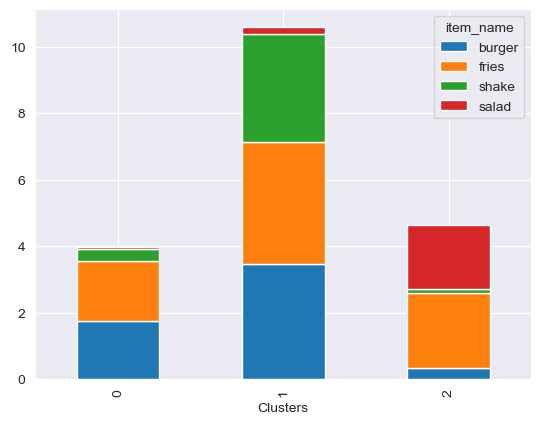

In [179]:
df.groupby('Clusters')[['burger', 'fries', 'shake', 'salad']].mean().plot.bar(stacked=True)

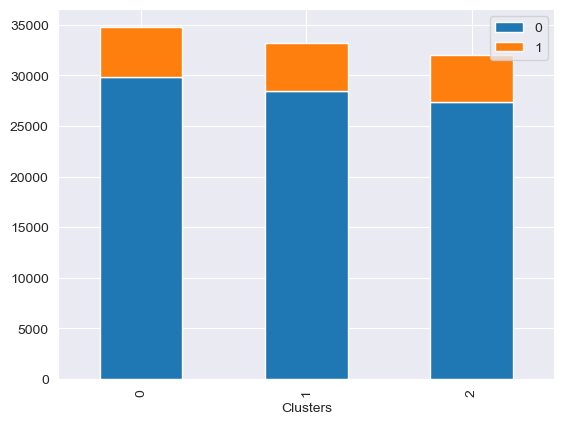

In [182]:
df.groupby('Clusters')['weekend'].value_counts().unstack().plot.bar(stacked=True).legend(loc='best')